<a href="https://colab.research.google.com/github/cristobalperezp/MDS7202-Laboratorio/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristóbal Pérez
- Nombre de alumno 2: Patricio Pérez


### **Link de repositorio de GitHub:** `https://github.com/cristobalperezp/MDS7202-Laboratorio`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [400]:
# Libreria Core del lab.
import numpy as np
#!pip install --upgrade pandas
#!pip install xlrd
#!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
#!pip install --upgrade plotly
#!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [401]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/Universidad/11° Semestre/Laboratorio de Programación/Laboratorios'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [402]:
#df_retail = pd.read_pickle("/content/drive/MyDrive/Universidad/11° Semestre/Laboratorio de Programación/Laboratorios/online_retail_II.pickle")
df_retail = pd.read_pickle("https://raw.githubusercontent.com/patricperz/MDS7202-Laboratorio/main/online_retail/online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
        "Country": "category"
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom



El dataset está compuesto por 8 columnas:

In [403]:
list(df_retail.columns)

['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'Country']

con los siguientes tipos de variable

In [404]:
df_retail.dtypes

Invoice              category
StockCode            category
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID          category
Country              category
dtype: object

Las variables vendrían a representar lo siguiente:

| Variable      | Description |
| ----------- | ----------- |
| Invoice      |    número de factura    |
|  StockCode  |     código de stock    |
|   Description    |    descripción del producto    |
| Quantity   |   cantidad comprada      |
|   InvoiceDate    |    fecha de factura    |
|  Price  |     precio    |
|    Customer ID   |   ID del comprador     |
|  Country   |    país de compra     |

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> Respuesta Aquí

El análisis univariado estudia una sola variable a la vez, en cambio el multivariado, estudia múltiples variables al mismo tiempo. El análisis de datos faltantes implica estudiar y tratar los datos ausentes, ya que estos pueden afectar la interpretación de los resultados obtenidos.
Estos análisis permiten comprender mejor las características individuales de las variables, como identificar relaciones y patrones entre variables, comprender los tipos de datos faltantes, y al abordar estos, garantizar interpretaciones precisas de los resultados a obtener de los datos. 

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [405]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [406]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203820 bytes
dtype: object

    Análisis de Price

La serie 'Price' posee 525.461 observaciones, con una media de 4,69 y desviación estandar de 146,13, con un mínimo y máximo de 1,25 y 25.111,09 respectivamente. El primer cuartil se encuentra en 1,25, el segundo en 2,1 y el tercero en 4,21. La serie posee 3 valores negativos (0%) y 3.687 ceros (0,7%). No posee valores nulos, y existen 524.485 filas duplicadas (99,81%).

La serie tiene una distribución con una kurtosis de 64.868,34 y skewness de -140,77, encontrándose concentrada hacia la izquierda y una cola alargada a la derecha (contrario a lo señalado por la skewness).

In [407]:
profile_serie(df_retail['Invoice'])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338390 bytes
dtype: object

    Análisis de Invoice

La serie 'Invoice' posee 525.461 observaciones, es una variable categórica con 28.816 valores únicos, siendo la moda '537.434' con una frecuencia de 675 repeticiones. No posee valores nulos, y existen 517.456 filas duplicadas (98,48%).

In [408]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220246 bytes
dtype: object

    Análisis de StockCode

La serie 'StockCode' posee 525.461 observaciones, es una variable categórica con 4.632 valores únicos, siendo la moda '85123A' con una frecuencia de 3.516 repeticiones. No posee valores nulos, y existen 525.026 filas duplicadas (99,92%).

In [409]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203820 bytes
dtype: object

    Análisis de Description

La serie 'Description' posee 525.461 observaciones, es una variable tipo objeto, ya que contiene strings, con 4.682 valores únicos, siendo la moda 'WHITE HANGING HEART T-LIGHT HOLDER' con una frecuencia de 3.549 repeticiones. No posee valores nulos, y existen 525.198 filas duplicadas (99,95%).

In [410]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203820 bytes
dtype: object

    Análisis de Quantity

La serie 'Quantity' posee 525.461 observaciones, con una media de 10,34 y desviación estandar de 107,42, con un mínimo y máximo de -9.600 y 19.152 respectivamente. El primer cuartil se encuentra en 1, el segundo en 3 y el tercero en 10. La serie posee 12.326 valores negativos (2,35%) y 0 valores iguales a cero. No posee valores nulos, y existen 525.122 filas duplicadas (99,94%). La existencia de valores negativos y ceros en la serie, puede deberse a devoluciones de productos, o a errores en la carga de datos.

La serie tiene una distribución con una kurtosis de 6.277,67 y skewness de 36,04, encontrándose concentrada hacia la derecha y una cola más alargada a la derecha.

In [411]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203820 bytes
dtype: object

    Análisis de InvoiceDate

La serie 'InvoiceDate' posee 525.461 observaciones, es una variable de tipo datetime con inicio en 2009-12-01 07:45:00 y término en 2010-12-09 20:01:00, abarcando un poco más de un año de observaciones. No posee valores nulos, y existen 520.400 filas duplicadas (99,04%).

In [412]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218254 bytes
dtype: object

    Análisis de Customer ID

La serie 'Customer ID' posee 525.461 observaciones, es una variable categórica con 4.383 valores únicos, siendo la moda '14.911' con una frecuencia de 5.710 repeticiones. Posee 107.927 valores nulos (20,54%), y existen 525.327 filas duplicadas (99,97%).

In [413]:
profile_serie(df_retail['Country'])

## Country Profile

Type                            category
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory        526985 bytes
dtype: object

    Análisis de Country

La serie 'Country' posee 525.461 observaciones, es una variable categórica con 40 valores únicos, siendo la moda 'United Kingdom' con una frecuencia de 485.852 repeticiones. No posee valores nulos, y existen 525.461 filas duplicadas (100%).

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [414]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

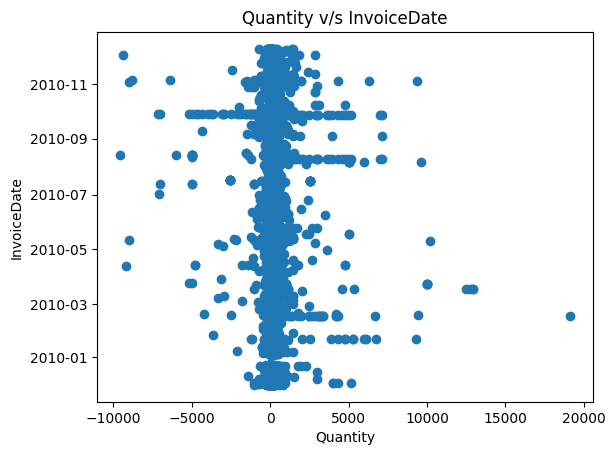

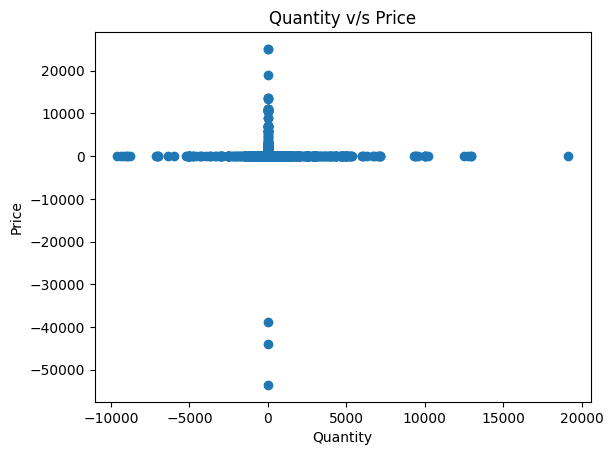

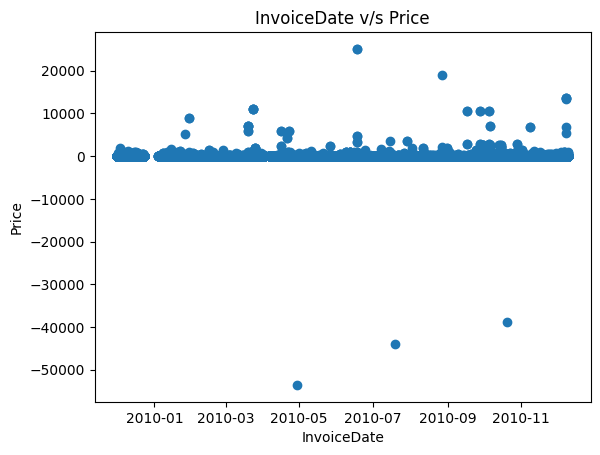

## Correlation:

## Missing Matrix:

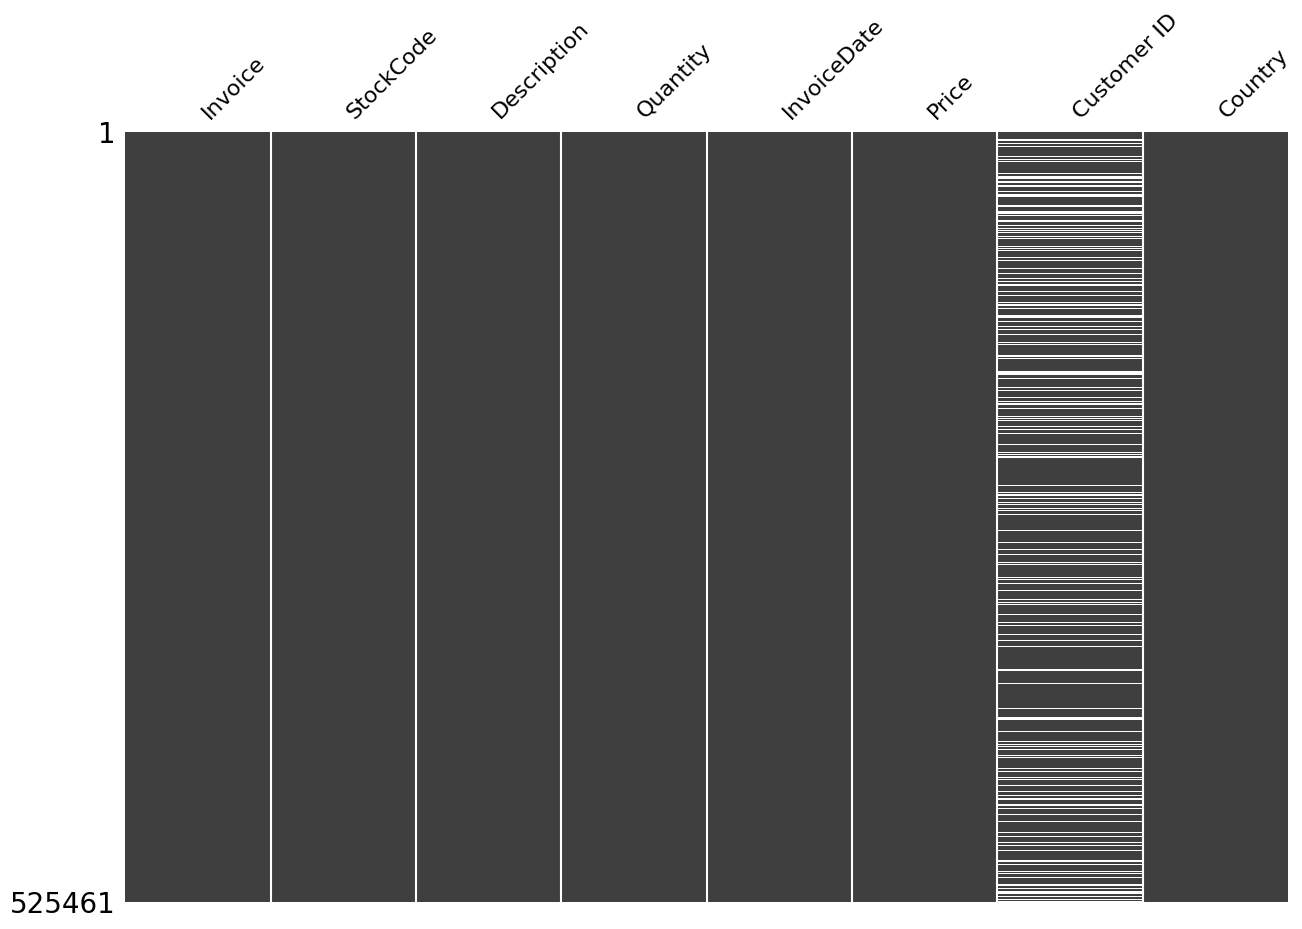

In [415]:
profile_df(df_retail)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [416]:
def clean_df(dataframe_in):
    # Eliminación de valores negativos en Quantity
    dataframe_in = dataframe_in[dataframe_in['Quantity'] > 0]
    # Eliminación de valores con precios unitarios negativos o 0
    dataframe_in = dataframe_in[dataframe_in['Price'] > 0]

    # Eliminación de outliers en Quantity
    dataframe_in = dataframe_in[dataframe_in['Quantity'] < 100]

    # Elimiación de outliers en Price
    dataframe_in = dataframe_in[dataframe_in['Price'] < 50]
    
    # Actualizar el DataFrame de entrada con los cambios
    dataframe_in.reset_index(drop=True, inplace=True)



    return dataframe_in

In [417]:
df_retail = clean_df(df_retail)

Decidimos no eliminar los valores con customerID nulos, porque la tienda es europea y en comparación a Chile, no se necesita un identificador o un RUT para poder efectuar una compra. Desde el punto de vista de la privacidad, es buena idea. Además, no se puede eliminar el 20% de los datos sin analizar, porque se perdería mucha información.

Como se entiende que es una tienda minorista (Retail), se decidió eliminar las facturas con Cantidad sobre 100 de algún producto, entendiendo que es un error de tipeo o de carga de datos. La misma idea para los precios, se eliminaron los precios unitarios sobre 50, porque al visualizar los datos, la distribución de precios sin outliers se encuentran entre 0 y 9 libras esterlinas, suponemos esta moneda porque la mayoría de los clientes son del Reino Unido, y que la mayoria de los productos son de bajo costo, por la descripción.

In [418]:
# Volver a hacer analisis exploratorio
profile_serie(df_retail['Price'])

## Price Profile

Type                            float64
Number of observations         503597.0
Mean                            3.42754
Std                            3.710816
Min                               0.001
25%                                1.25
50%                                 2.1
75%                                4.21
Max                               49.95
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                          20.652998
Skew                            3.50235
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   503401
Duplicate rows (%)              99.96 %
Total size in memory      4028908 bytes
dtype: object

In [419]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         503597.0
Mean                           7.590357
Std                           11.354901
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                                99.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                            19.1752
Skew                           3.753006
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   503595
Duplicate rows (%)              100.0 %
Total size in memory      4028908 bytes
dtype: object

## Bivariant Analysis:

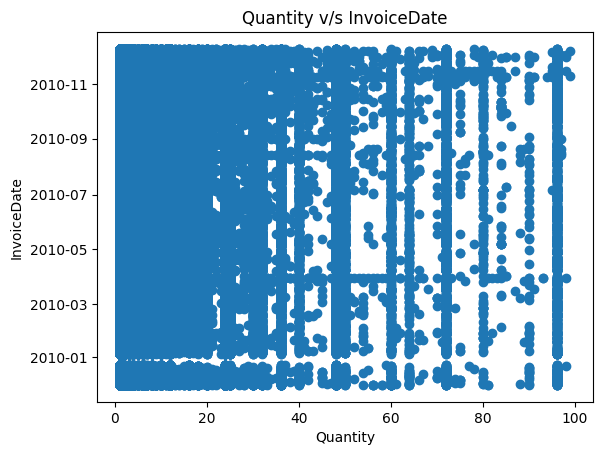

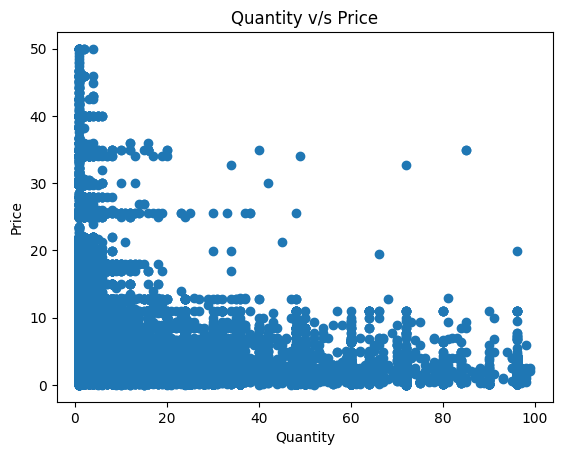

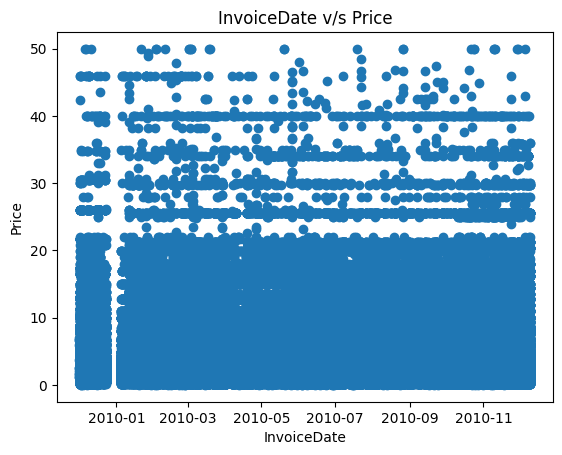

## Correlation:

## Missing Matrix:

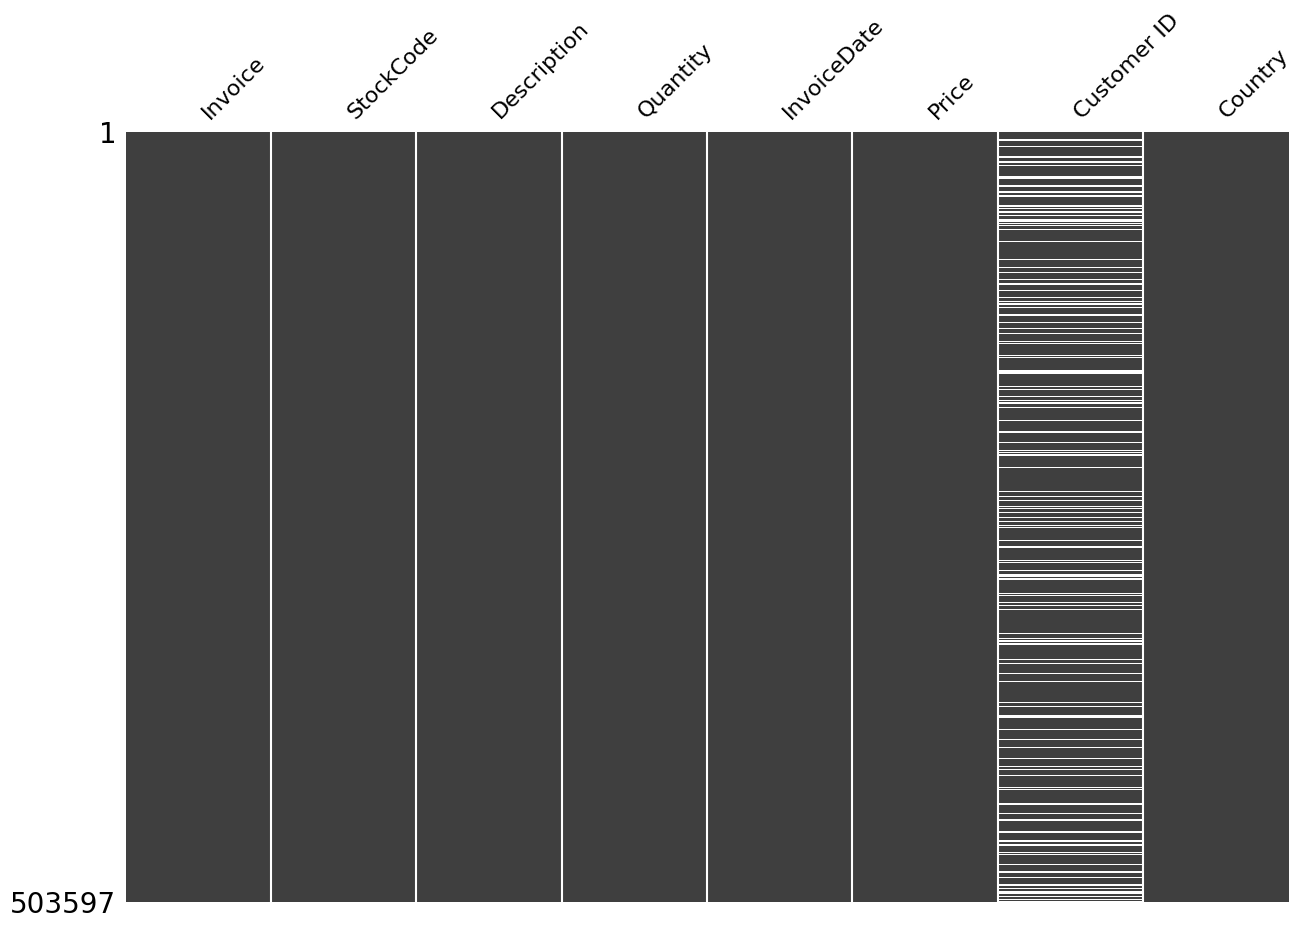

In [420]:
profile_df(df_retail)

Las principales diferencias es que ahora es mas fácil hacer análisis a los datos, porque no hay valores negativos, ni valores extremos. Además, se puede ver que la correlación entre las variables es mas clara, y que la matriz de datos faltantes es mas clara, porque no hay valores nulos en variables de interés.

Especificamente ahora vemos que hay una correlación negativa entre precio y cantidad, lo que tiene sentido, porque si un producto es mas caro, se compran menos unidades. Ademas una correlacion entre precio y fecha, lo que tiene sentido, porque los precios pueden variar en el tiempo, y tienen tendencia a subir. Por ultimo, hay una correlacion entre cantidad y fecha, lo que tiene sentido, porque en el tiempo se compran mas productos, entendiendo que el negocio crece, y que hay mas clientes. (Esto se ve pero es muy leve, porque la correlacion es de 0.01), pero se puede ver en los siguientes gráficos.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [421]:
# generamos una nueva columna con el total de la venta de cada producto, es decir Quantity * UnitPrice
df_retail['Total'] = df_retail['Quantity'] * df_retail['Price']

In [422]:
# Agrupar por Descripcion y sumar la cantidad y el total de cada producto
df_retail_grouped = df_retail.groupby(['Description']).agg({'Quantity': 'sum', 'Total': 'sum'}).reset_index()

# ordenamos de mayor a menor por el Total
df_retail_grouped = df_retail_grouped.sort_values(by='Total', ascending=False)

In [423]:
#   Top 30 productos que generan más ganancias, doble barra una al lado de la otra, una para la cantidad y otra para el total, con plotly
fig = px.bar(df_retail_grouped.head(30), x='Description', y=['Total', 'Quantity'], title='Top 30 productos que generan más ganancias')

# Dobles ejes Y
fig.update_layout(barmode='group')
fig.update_yaxes(title_text="Total", secondary_y=False)
fig.update_yaxes(title_text="Quantity", secondary_y=True)


fig.show()

Se puede ver que los articulos que generan más ganancia, no necesariamente son los más vendidos, esto se puede explicar porque los productos mas caros, se venden menos unidades, pero generan mas ganancia. Por ejemplo, puede pasar que el producto mas vendido es un producto de bajo costo, pero no genera tanta ganancia como el segundo producto mas vendido, que es un producto de alto costo.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

##### Opción 1: Monto Total Ventas

In [424]:
def plot_ventas(dataframe):
    #convertimos la columna InvoiceDate a datetime
    dataframe['InvoiceDate'] = pd.to_datetime(dataframe['InvoiceDate'])
    #convertimos a fecha año-mes-día
    dataframe['InvoiceDate'] = dataframe['InvoiceDate'].dt.date
    #agrupamos por fecha y sumamos la cantidad
    dataframe = dataframe.groupby(['InvoiceDate']).agg({'Total': 'sum'}).reset_index()
    #ordenamos por fecha
    dataframe = dataframe.sort_values(by='InvoiceDate', ascending=True)
    #graficamos
    fig = px.line(dataframe, x='InvoiceDate', y='Total', title='Ventas respecto al tiempo')
    fig.update_traces(mode='lines+markers')
    fig.show()
    pass 

In [425]:
plot_ventas(df_retail)

##### Opción 2: Q Total Ventas

In [426]:
def plot_ventas_Q(dataframe):
    #convertimos la columna InvoiceDate a datetime
    dataframe['InvoiceDate'] = pd.to_datetime(dataframe['InvoiceDate'])
    #convertimos a fecha año-mes-día
    dataframe['InvoiceDate'] = dataframe['InvoiceDate'].dt.date
    #agrupamos por fecha y sumamos la cantidad
    dataframe = dataframe.groupby(['InvoiceDate']).agg({'Quantity': 'sum'}).reset_index()
    #ordenamos por fecha
    dataframe = dataframe.sort_values(by='InvoiceDate', ascending=True)
    #graficamos
    fig = px.line(dataframe, x='InvoiceDate', y='Quantity', title='Q de ventas respecto al tiempo')
    fig.update_traces(mode='lines+markers')
    fig.show()
    pass 

In [427]:
plot_ventas_Q(df_retail)

En los graficos podemos ver una tendecia a la subida en el monto generado y también en el Q de ventas, pero vemos también importantes saltos en el tiempo, lo que puede ser un indicador de que hay datos extraños, o que hay un cambio en el negocio, por ejemplo que se hizo una campaña de marketing, o que se hizo una promoción tal día, fue un día de semana o fin de semana, etc.

También vemos que muchos días no hay ventas, lo que puede ser un indicador de que no se trabaja los fines de semana, o que no se trabaja en días festivos, o que no se trabaja en vacaciones, etc.

También existen peaks de ventas, que pueden ser por campañas de marketing, o por promociones, o por que se hizo un evento, como se explica anteriormente.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>